In [22]:
# install mctest package
install.packages('mctest', repos='http://cran.us.r-project.org')

In [ ]:
library(foreign) # library for importing sav file (SPSS) into R.
library(mctest) # package for running multicolinearity tests

In [15]:
dataset = read.spss("./data/cars.sav", to.data.frame=TRUE)

In [16]:
str(dataset)

'data.frame':	81 obs. of  8 variables:
 $ Manufacturer: Factor w/ 32 levels "Acura                                     ",..: 1 1 2 2 3 4 4 4 4 5 ...
 $ Model       : Factor w/ 81 levels "100                                       ",..: 43 48 1 8 5 20 50 62 63 30 ...
 $ Type        : Factor w/ 5 levels "Compact              ",..: 4 3 3 1 3 3 2 3 2 2 ...
 $ Price       : num  15.9 33.9 37.7 29.1 30 15.7 20.8 26.3 23.7 34.7 ...
 $ Citympg     : num  25 18 19 20 22 22 19 19 16 16 ...
 $ EngineSize  : num  1.8 3.2 2.8 2.8 3.5 2.2 3.8 3.8 5.7 4.9 ...
 $ Horsepower  : num  140 200 172 172 208 110 170 170 180 200 ...
 $ Weight      : num  2705 3560 3405 3375 3640 ...
 - attr(*, "codepage")= int 65001


In [17]:
# Add extra features
dataset$Horsepower2 <- dataset$Horsepower^2
dataset$Citympg2 <- dataset$Citympg^2

In [24]:
str(dataset)

'data.frame':	81 obs. of  10 variables:
 $ Manufacturer: Factor w/ 32 levels "Acura                                     ",..: 1 1 2 2 3 4 4 4 4 5 ...
 $ Model       : Factor w/ 81 levels "100                                       ",..: 43 48 1 8 5 20 50 62 63 30 ...
 $ Type        : Factor w/ 5 levels "Compact              ",..: 4 3 3 1 3 3 2 3 2 2 ...
 $ Price       : num  15.9 33.9 37.7 29.1 30 15.7 20.8 26.3 23.7 34.7 ...
 $ Citympg     : num  25 18 19 20 22 22 19 19 16 16 ...
 $ EngineSize  : num  1.8 3.2 2.8 2.8 3.5 2.2 3.8 3.8 5.7 4.9 ...
 $ Horsepower  : num  140 200 172 172 208 110 170 170 180 200 ...
 $ Weight      : num  2705 3560 3405 3375 3640 ...
 $ Horsepower2 : num  19600 40000 29584 29584 43264 ...
 $ Citympg2    : num  625 324 361 400 484 484 361 361 256 256 ...
 - attr(*, "codepage")= int 65001


In [19]:
fitted_model <- lm(Price ~ Citympg + Citympg2 + EngineSize + Horsepower + Horsepower2+  Weight, dataset)

In [20]:
anova(fitted_model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Citympg,1,2743.500653,2743.500653,121.5739256,2.810266e-17
Citympg2,1,1065.357242,1065.357242,47.2096341,1.709079e-09
EngineSize,1,10.704627,10.704627,0.4743587,4.931425e-01
Horsepower,1,640.750010,640.750010,28.3938311,1.028033e-06
Horsepower2,1,3.394763,3.394763,0.1504336,6.992348e-01
Weight,1,52.268851,52.268851,2.3162121,1.322934e-01
Residuals,74,1669.922620,22.566522,NA,NA


In [ ]:
# MCT tests, see what variables are colinear

In [32]:
x <- dataset[ , c("Citympg", "Citympg2", "EngineSize", "Horsepower", "Horsepower2", "Weight")]
y <- dataset[,"Price"]

In [28]:
eigprop(x)


Call:
eigprop(x = dataset[, c("Citympg", "Citympg2", "EngineSize", 
    "Horsepower", "Horsepower2", "Weight")])

  Eigenvalues       CI Intercept Citympg Citympg2 EngineSize Horsepower
1      6.2039   1.0000    0.0000  0.0000   0.0001     0.0004     0.0001
2      0.6604   3.0650    0.0000  0.0001   0.0021     0.0016     0.0003
3      0.1048   7.6930    0.0005  0.0000   0.0060     0.0359     0.0002
4      0.0265  15.3117    0.0063  0.0010   0.0208     0.3538     0.0051
5      0.0025  49.4257    0.0608  0.0300   0.0892     0.3191     0.2538
6      0.0015  63.4522    0.0014  0.0032   0.0051     0.2434     0.7342
7      0.0003 135.4525    0.9309  0.9657   0.8767     0.0456     0.0064
  Horsepower2 Weight
1      0.0002 0.0001
2      0.0054 0.0000
3      0.0482 0.0025
4      0.0001 0.0029
5      0.3686 0.2306
6      0.5753 0.6749
7      0.0022 0.0889

Row 7==> Citympg, proportion 0.965656 >= 0.50 
Row 7==> Citympg2, proportion 0.876735 >= 0.50 
Row 6==> Horsepower, proportion 0.734159 >= 0

In [ ]:
# Citympg, Citympg2, Horsepower, Horsepower2, Weight are all likely to be multicolinear

# The eigenvalues in row 6 & 7 > 5, so show signs of colinearity, 
# The variables which contribute to these eigenvalues are citympg, citympg2, Horsepower, Horsepower2, Weight

In [33]:
mctest(x, y)


Call:
omcdiag(x = x, y = y, Inter = TRUE, detr = detr, red = red, conf = conf, 
    theil = theil, cn = cn)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.0000         1
Farrar Chi-Square:       927.6313         1
Red Indicator:             0.7750         1
Sum of Lambda Inverse:   255.2278         1
Theil's Method:            2.0624         1
Condition Number:        135.4525         1

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test


In [ ]:
# correlation matrix

In [35]:
cor(x)

,Citympg,Citympg2,EngineSize,Horsepower,Horsepower2,Weight
Citympg,1.0000000,0.9858764,-0.7458599,-0.7029397,-0.6036426,-0.8345534
Citympg2,0.9858764,1.0000000,-0.6635178,-0.6306246,-0.5284987,-0.7662335
EngineSize,-0.7458599,-0.6635178,1.0000000,0.7734487,0.7036377,0.9168041
Horsepower,-0.7029397,-0.6306246,0.7734487,1.0000000,0.9749079,0.8587538
Horsepower2,-0.6036426,-0.5284987,0.7036377,0.9749079,1.0000000,0.7752745
Weight,-0.8345534,-0.7662335,0.9168041,0.8587538,0.7752745,1.0000000


In [ ]:
# Can see high levels of correlation in most combinations, corr > 0.7 corr < -0.7

In [ ]:
# Scatter plot of correlation between different variables

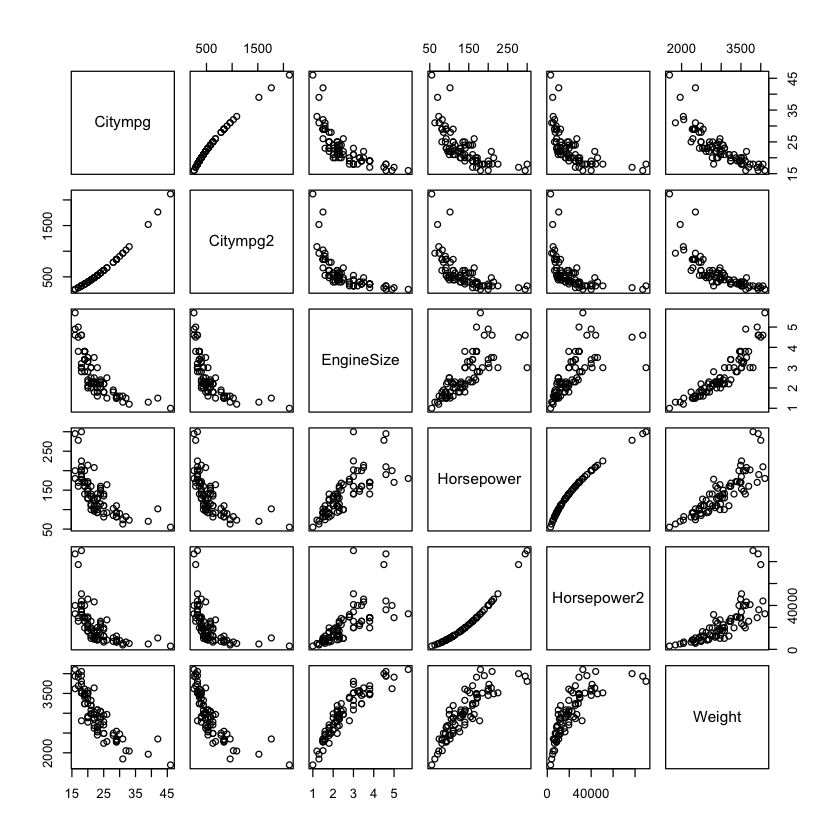

In [36]:
pairs(x)